# Exploring colour channels

In this session, we'll be looking at how to explore the different colour channels that compris an image.

In [1]:
# We need to include the home directory in our path, so we can read in our own module.
import os

# image processing tools
import cv2
import numpy as np

# utility functions for this course
import sys
sys.path.append(os.path.join("..", "..", "CDS-VIS"))
from utils.imutils import jimshow
from utils.imutils import jimshow_channel

# plotting tool
import matplotlib.pyplot as plt

## Splitting channels

In [2]:
filename = os.path.join('..', '..', 'CDS-VIS', 'img', 'terasse.jpeg')

In [3]:
image = cv2.imread(filename)

In [ ]:
jimshow(image, 'terasse')

In [ ]:
b, g, r = cv2.split(image)

In [ ]:
jimshow_channel(r, 'red')

__Empty numpy array__

In [15]:
zeros = np.zeros(image.shape[:2], dtype = 'uint8') #by creating zero arrays and using them as the 'lacking' channels, 
# we can show the colour channels in color. 

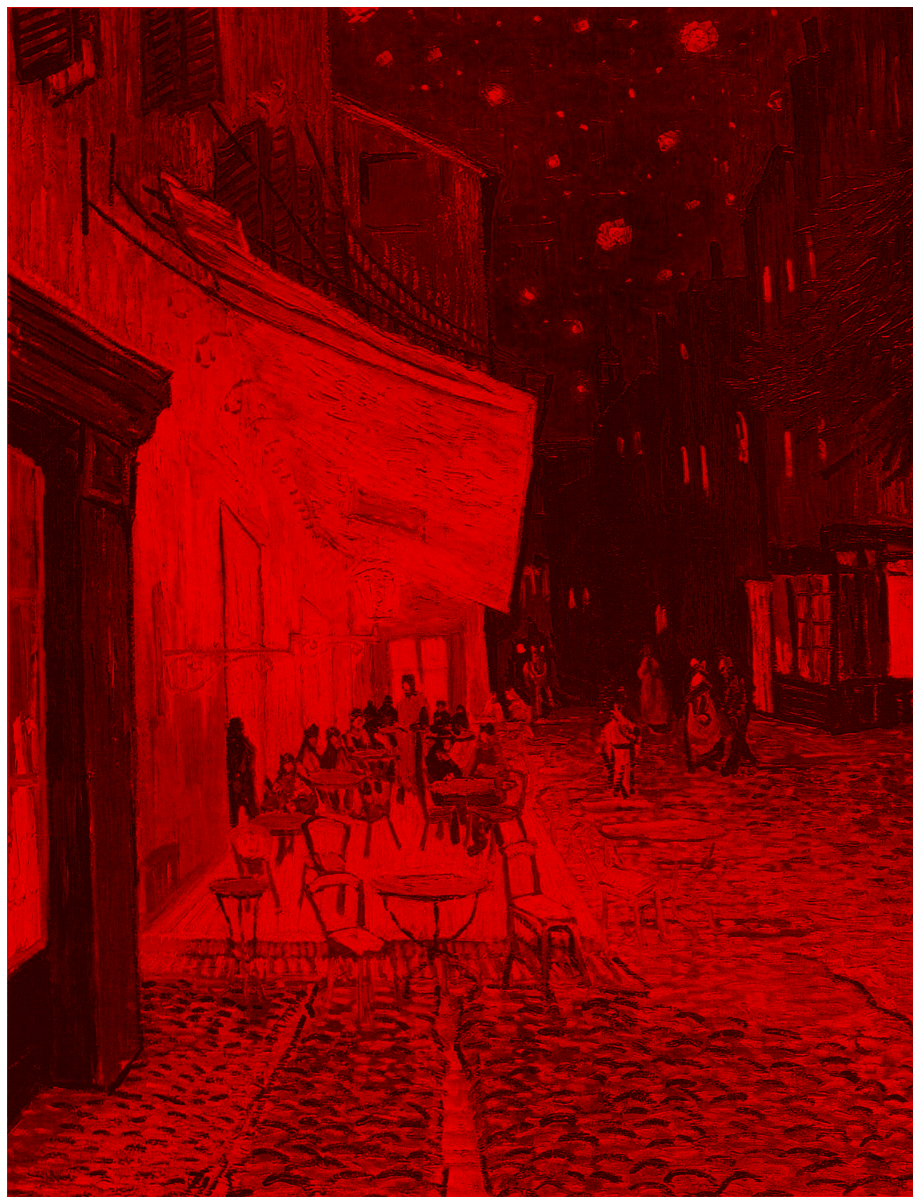

In [20]:
jimshow(cv2.merge([zeros, zeros, r]))

## Histograms

In [21]:
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

__A note on ```COLOR_BRG2GRAY```__

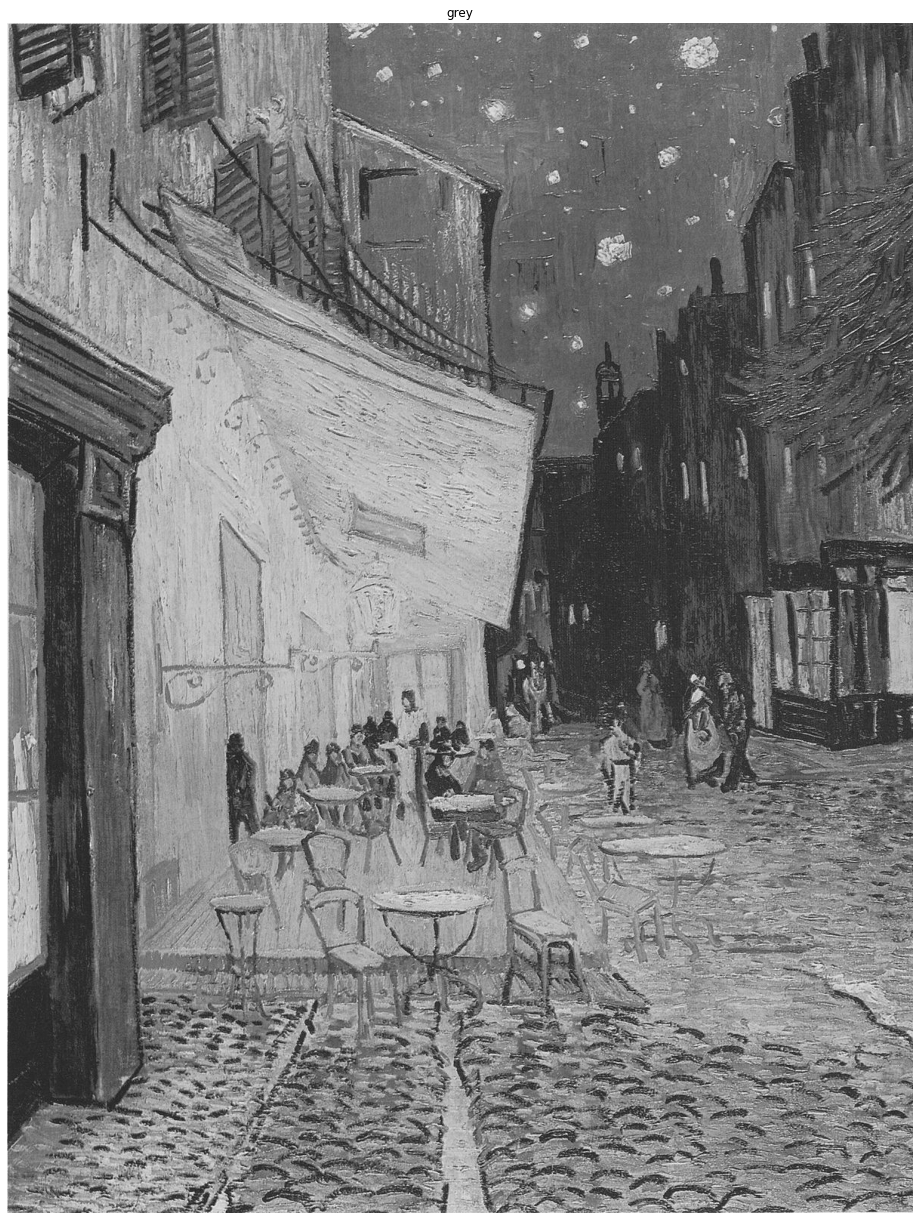

In [24]:
jimshow_channel(grey, 'grey')

```greyed_image.flatten() != image.flatten()``` creates a true greyscale image, albeit a bit hackily

## A quick greyscale histogram using matplotlib

In [25]:
real_grey = image.flatten()

In [26]:
print(real_grey.shape)

(5673600,)


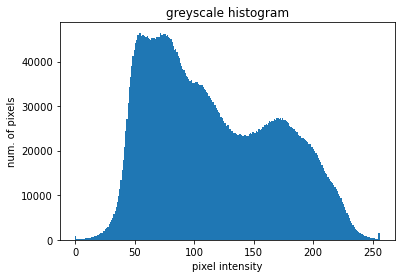

In [27]:
# creating canvas / figure
plt.figure()

# add histogram
plt.hist(real_grey, 256, [0, 256]) #first number is values up, second is x

#add titles
plt.title('greyscale histogram')
plt.xlabel('pixel intensity')
plt.ylabel('num. of pixels')

# actually bring up the plot
plt.show()

## Plotting color histograms

```cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])```

- images : it is the source image of type uint8 or float32 represented as “[img]”.
- channels : it is the index of channel for which we calculate histogram. 
    - For grayscale image, its value is [0] and
    - color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as “None”.
- histSize : this represents our BIN count. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].